In [1]:
import torch
from dpm.models import BernoulliNaiveBayes
from dpm.visualize import plot_stats
import numpy as np

In [2]:
y = torch.cat((torch.zeros(1000), torch.ones(2000))).view(-1, 1).float()
y.shape

torch.Size([3000, 1])

In [3]:
np.random.binomial(size=(3, 3), n=1, p=0.6)

array([[1, 1, 0],
       [0, 1, 1],
       [1, 0, 0]])

In [4]:
x = torch.cat((torch.tensor(np.random.binomial(size=(1000, 10), n=1, p=0.7)), 
               torch.tensor(np.random.binomial(size=(2000, 10), n=1, p=0.2))), dim=0).float()
x.shape

torch.Size([3000, 10])

In [5]:
model = BernoulliNaiveBayes()

In [6]:
model.log_prob(x, y)

tensor([ -8.8452, -10.0041,  -8.5953,  ..., -11.2501, -11.2033,  -8.1191],
       grad_fn=<SumBackward2>)

In [7]:
model.y_dist.probs

Parameter containing:
tensor([0.2636], requires_grad=True)

In [8]:
stats = model.fit(x, y)

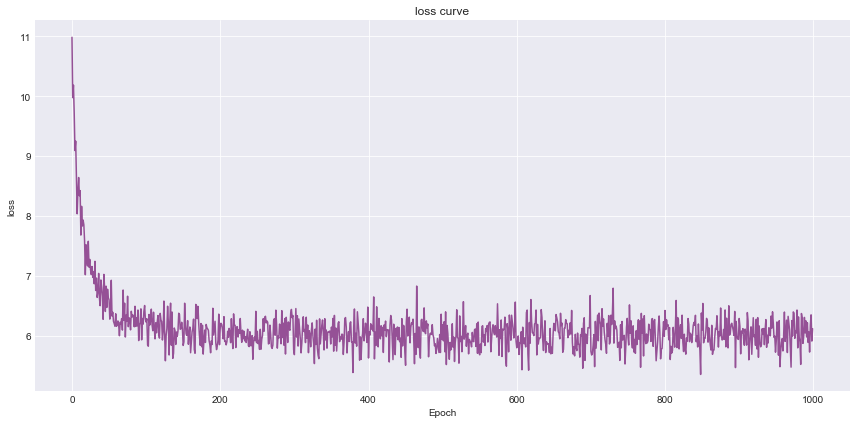

In [9]:
plot_stats(stats)

In [10]:
model.y_dist.probs

Parameter containing:
tensor([0.6638], requires_grad=True)

In [11]:
(model.predict(x) == y.long()).float().mean()

tensor(0.9617)

In [12]:
model.x_dist[0].probs

Parameter containing:
tensor([0.7154, 0.6906, 0.6795, 0.7075, 0.7047, 0.6750, 0.7421, 0.6385, 0.7052,
        0.6726], requires_grad=True)

In [13]:
model.x_dist[1].probs

Parameter containing:
tensor([0.2029, 0.1994, 0.2160, 0.2164, 0.1968, 0.1881, 0.2224, 0.2117, 0.1773,
        0.2211], requires_grad=True)

In [14]:
X = model.sample(5)
print(X)
print(X.mean(dim=1))

tensor([[0., 1., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [1., 1., 0., 1., 1., 1., 0., 1., 1., 0.],
        [1., 0., 1., 1., 0., 1., 1., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]], grad_fn=<IndexBackward>)
tensor([0.2000, 0.1000, 0.7000, 0.6000, 0.1000], grad_fn=<MeanBackward2>)


In [15]:
model.predict(X)

tensor([[1],
        [1],
        [0],
        [0],
        [1]])